Libraries imported successfully!
Sample dataset created successfully.
   user_id  account_age_days  num_connections  is_fraud
0       93               477               32         0
1       47               446               27         0
2       13               459               57         1
3       20               150               19         0
4       42               476               76         0
NetworkX graph built successfully.
Number of nodes: 100
Number of edges: 142
Feature engineering complete. Added 'degree' as a feature.
   user_id  account_age_days  num_connections  is_fraud  degree
0       93               477               32         0       2
1       47               446               27         0       6
2       13               459               57         1       2
3       20               150               19         0       3
4       42               476               76         0       3
Data split into training and testing sets.
Training set shape: (70, 3)
Tes

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


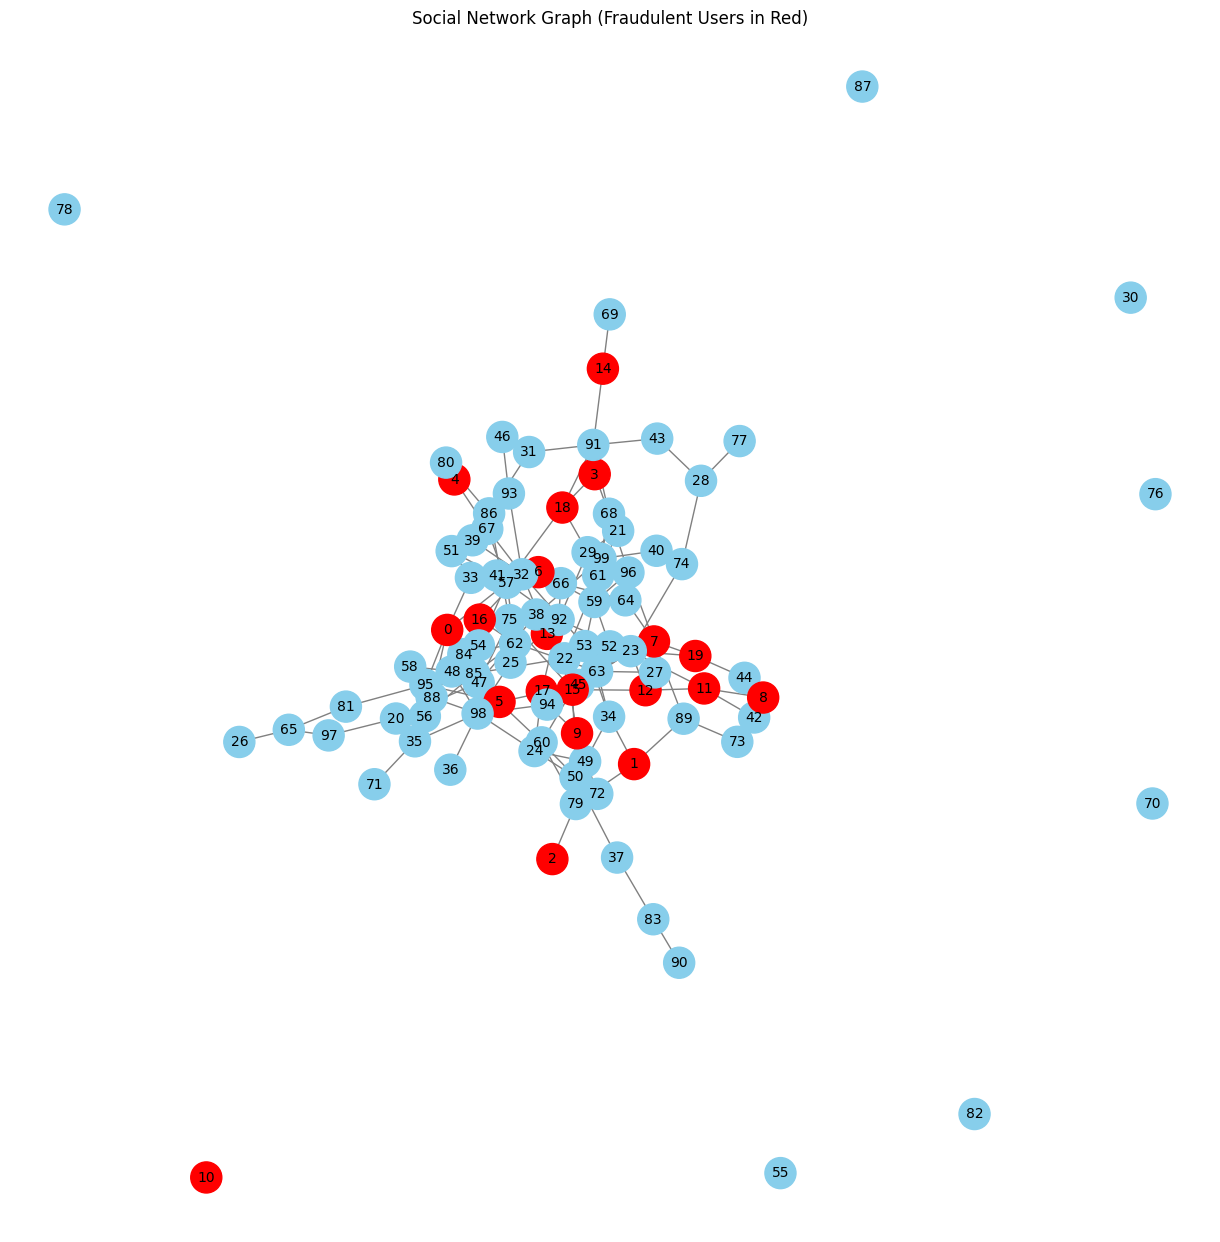

In [1]:
# Import necessary libraries
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

print("Libraries imported successfully!")
# This part simulates a dataset since we don't have the original.
# In a real project, you would load your data here.
np.random.seed(42)

# Create 100 users
num_users = 100
users = pd.DataFrame({
    'user_id': range(num_users),
    'account_age_days': np.random.randint(1, 500, size=num_users),
    'num_connections': np.random.randint(5, 100, size=num_users),
    # Let's assume 20% of users are fraudulent
    'is_fraud': [1] * 20 + [0] * 80
})

# Shuffle the users so fraud isn't just the first 20
users = users.sample(frac=1).reset_index(drop=True)

# Create some random connections (edges)
edges = []
for i in range(150): # 150 random connections
    u = np.random.randint(0, num_users)
    v = np.random.randint(0, num_users)
    if u != v:
        edges.append((u, v))

print("Sample dataset created successfully.")
print(users.head())
# Create a graph from the user data
G = nx.Graph()

# Add nodes (users) to the graph
for index, row in users.iterrows():
    G.add_node(row['user_id'], is_fraud=row['is_fraud'])

# Add edges (connections) to the graph
G.add_edges_from(edges)

print("NetworkX graph built successfully.")
print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
# Use graph properties as features for our model.
# A simple feature is 'degree', which is the number of connections a node has.
users['degree'] = users['user_id'].apply(lambda x: G.degree(x))

print("Feature engineering complete. Added 'degree' as a feature.")
print(users.head())
# Define our features (X) and our target (y)
features = ['account_age_days', 'num_connections', 'degree']
target = 'is_fraud'

X = users[features]
y = users[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print(f"Data split into training and testing sets.")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
# We will use Logistic Regression, a common classification model
model = LogisticRegression(random_state=42)

# Train the model on the training data
model.fit(X_train, y_train)

print("Model trained successfully.")
# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
# Visualize the graph to see the connections
plt.figure(figsize=(12, 12))

# Get the positions of the nodes
pos = nx.spring_layout(G, seed=42)

# Color nodes based on whether they are fraudulent or not
node_colors = ['red' if G.nodes[n]['is_fraud'] == 1 else 'skyblue' for n in G.nodes]

# Draw the graph
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=10, edge_color='gray')

plt.title("Social Network Graph (Fraudulent Users in Red)")
plt.show()